In [14]:
import gymnasium as gym
from stable_baselines3 import DDPG,PPO


In [ ]:
env = gym.make("HalfCheetah-v5", render_mode="human")  # Set render_mode to None for training
obs, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()  # Take random actions
    obs, reward, done, truncated, info = env.step(action)

env.close()

In [ ]:
env = gym.make("HalfCheetah-v4")
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1_000_000)
model.save("ppo_halfcheetah")


c:\Users\Rishub\anaconda3\envs\rlenv\lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -335     |
| time/              |          |
|    fps             | 2804     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -385        |
| time/                   |             |
|    fps                  | 1972        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009834007 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss   

In [15]:
model = PPO.load("ppo_halfcheetah.zip")

print(model.policy)

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=17, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=17, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=6, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)


0.1938323111687053
-0.06413286737067803
-0.8808012752499416
-0.885675981481585
-0.3827021120269949
0.016145076702479444
-1.1778674956402337
-1.486257297309891
-1.1197858334669257
-1.1979933562018665
-1.3522994743259174
-1.1753107439927313
-1.1570249777900898
-1.4557174103954602
-1.3460004045023402
0.023043441507326845
-0.9044946259452085
-1.263684399349331
-1.8990425067964134
-2.1120949715022483
-0.20654532360470013
-0.5789462427179197
-0.05832472384024534
-0.7110459376950082
-0.9881791434542206
-0.5411121711014917
-0.0734223829618248
-0.9155305849331308
-1.1452290245468357
0.2817730840947412
-0.3701188571203917
-0.6063257500186019
-0.6350086600615508
-0.8269583351501621
-0.31190787376375484
0.20491157686295614
0.18949011083943113
-0.45242122267035656
-0.5491082417897744
-0.295407166622045
0.053005748193093005
-0.031044178232571884
0.3882957703721188
0.9414052693599113
1.0062500016720604
0.7931814502715762
1.0710521355597091
1.0409620501536536
0.22805723018294377
-0.09589017739374839
0

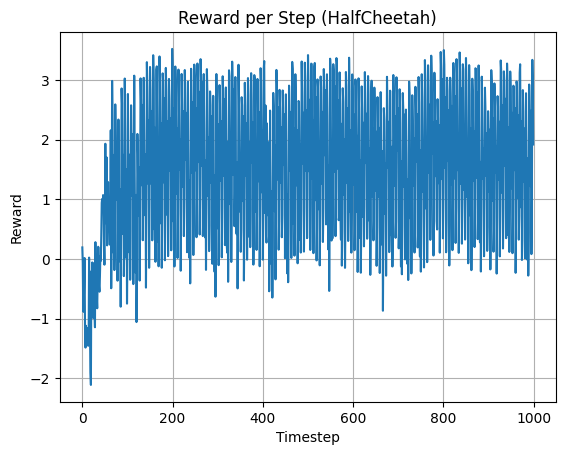

In [16]:
import matplotlib.pyplot as plt
import time

env = gym.make("HalfCheetah-v5", render_mode="human")
obs, _ = env.reset()

# Store rewards for plotting
rewards = []

# Run the model
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)
    print(reward)
    rewards.append(reward)

    if done or truncated:
        obs, _ = env.reset()
    
   

env.close()

# Plot the rewards
plt.plot(rewards)
plt.title("Reward per Step (HalfCheetah)")
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.grid(True)
plt.show()


TypeError: MujocoEnv.__init__() got an unexpected keyword argument 'track_body_id' was raised from the environment creator for HalfCheetah-v5 with kwargs ({'render_mode': 'human', 'camera_id': 0, 'track_body_id': 1})

-0.1529074722220105
-0.46699779412078685
-0.643057637743795
-0.5811510269213803
0.8615578454643906
0.6709729604443833
-1.2988119668525115
-0.9207855257569066
1.1480633683903945
1.5614430086718791
-0.16793841937607457
-0.6594861778212
0.2945556477822118
1.955465670040955
1.636242312974145
0.46473702717624166
-0.6210187821357074
0.6751185651243974
2.2144329335868544
1.2028420459300686
0.03234313491963059
0.3780438860713482
1.718974860727585
2.651658582330749
1.5629291755100096
0.7507480206598292
1.4759726131205033
3.1447987632576844
2.763150892707741
1.1371070558949414
1.45562510216865
2.5785980693036086
3.839643576652822
2.6632231881220667
0.19918482565384643
1.437257101992234
3.7820595726252595
3.5677799512974797
1.917300270103171
1.3177977704271662
2.1877403577666676
3.7568248870831322
4.013152447750075
2.1848594233193186
1.394356746222467
2.891520424321703
4.54811169788438
4.004638264523109
2.0662152624341736
1.4634622106330681
3.965330630350298
4.4599299916423725
3.4052087376888416


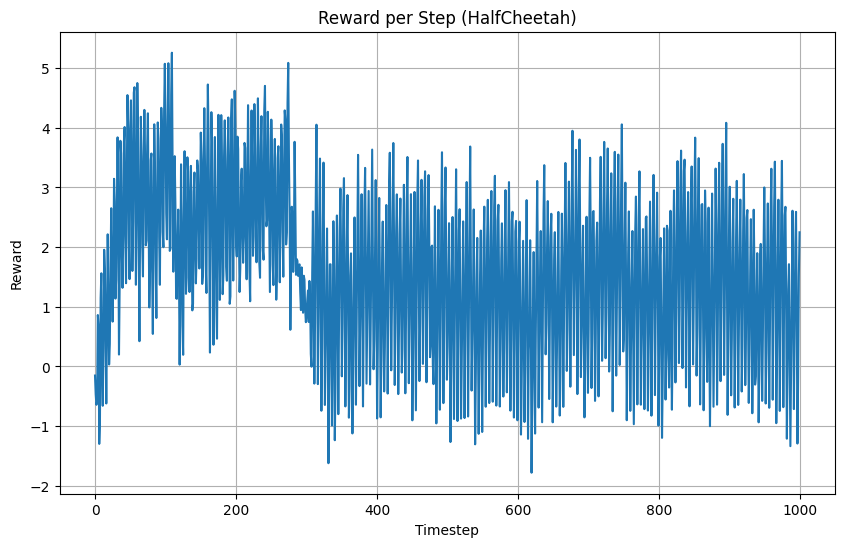

In [6]:
import gymnasium as gym
import matplotlib.pyplot as plt
import time
import numpy as np

# Create environment 
env = gym.make("HalfCheetah-v5", render_mode="human")
obs, _ = env.reset()

# Store rewards for plotting
rewards = []

# Run the model
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)
    print(reward)
    rewards.append(reward)
    
    # Manually update camera to follow the cheetah
    # Get the cheetah's x position
    cheetah_x_pos = env.unwrapped.data.qpos[0]
    
    # Update the camera's position to follow the cheetah
    if hasattr(env.unwrapped, 'viewer') and env.unwrapped.viewer is not None:
        env.unwrapped.viewer.cam.lookat[0] = cheetah_x_pos
        # You can adjust these values to change the camera angle and distance
        env.unwrapped.viewer.cam.distance = 4.0  # Distance from subject
        env.unwrapped.viewer.cam.elevation = -20.0  # Camera angle
        env.unwrapped.viewer.cam.azimuth = 90.0  # Camera rotation

    if done or truncated:
        obs, _ = env.reset()
    

env.close()

# Plot the rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.title("Reward per Step (HalfCheetah)")
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.grid(True)
plt.show()